Hospital Bloodstream Infection Dataset

Project Title: Identifying Key Risk Factors for Central Line-Associated Bloodstream Infections (CLABSIs)

Author: Aiswarya Jayaprakash

Tools: Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn

Introduction:

Central Line-Associated Bloodstream Infections (CLABSIs) are serious infections that occur when germs enter the bloodstream through a central line (central venous catheter. A central line  is a catheter (tube) that healthcare providers often place in a large vein in the neck, chest or groin to give medication or fluids or to collect blood for medical tests. Central lines are different from peripheral IVs (shorter IVs placed in the hand, arm or foot for vein access); central lines access a major vein close to the heart, can remain in place for weeks or months, and are much more likely to be a source of serious infection. Central lines are commonly used in intensive care units. CLABSIs result in thousands of deaths each year and billions of dollars in added costs however they are preventable. These infections are a significant cause of morbidity and mortality in hospitals.

Problem:
The goal of this project is to identify the key risk factors contributing to CLABSIs using machine learning techniques.
By analyzing patient and clinical data, we aim to predict the occurrence of positive gram-positive infections.

Importance:
This analysis can help improve hospital practices, reduce CLABSI rates, and enhance patient outcomes.

Goal of the project: To build a machine learning model that identifies the primary risk factors of CLABSIs and predicts the likelihood of gram-positive infections.

Key Metrics: Accuracy, Precision, Recall, F1-Score, Area Under the Receiver Operating Characteristic Curve (AUC-ROC)
    
Dataset Description:
The dataset contains information about hospital patients, including demographics, catheter usage, and clinical metrics. 
It includes categorical and numerical data.

Key Features:
* Patient demographics (Age, Gender, Ethnicity)
* Clinical indicators (Diabetes, White Blood Cell Count, C-Reactive Protein)
* Infection indicators (PositiveGramPositive, PositiveGramNegative)

Target Variable:
* PositiveGramPositive (1 = infection, 0 = no infection)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset
file_path = "E:\\ENTRI DSML\\DSML\\Project\\patient_data.xlsx" # Update the file path if needed
data = pd.read_excel(file_path)
data

PatientName        Age  Gender         Ethnicity  Diabetes  \
0           Susan Greene    elderly    male          Hispanic     False   
1          Paula Garrett    elderly    male          Hispanic     False   
2           Joseph Mejia      adult   other         Caucasian     False   
3           David Prince     infant    male         Caucasian     False   
4      Dakota Cunningham    elderly  female             Asian      True   
...                  ...        ...     ...               ...       ...   
49995      Marcus Bailey  pediatric   other  African American     False   
49996      Michael Garza    elderly    male  African American      True   
49997    Alexander Davis    elderly   other             Other     False   
49998      Kyle Marshall    elderly   other         Caucasian      True   
49999      Denise Wilson    elderly  female         Caucasian     False   

       Immunocompromised  ChronicRenalFailure                CatheterType  \
0                  False                False     central venous catheter   
1                  False                False     central venous catheter   
2                   True                False  peripheral venous catheter   
3                   True                 True            urinary catheter   
4                  False                False     central venous catheter   
...                  ...                  ...                         ...   
49995               True                 True            urinary catheter   
49996               True                False  peripheral venous catheter   
49997               True                 True     central venous catheter   
49998              False                 True     central venous catheter   
49999               True                 True  peripheral venous catheter   

      InsertionSite  Duration  ...  CReactiveProtein  PositiveGramPositive  \
0        subclavian        29  ...               4.8                 False   
1             other        19  ...               6.2                  True   
2           femoral        12  ...               3.0                 False   
3           jugular        13  ...               9.8                 False   
4           femoral        27  ...               0.1                  True   
...             ...       ...  ...               ...                   ...   
49995         other         7  ...               2.6                  True   
49996    subclavian         8  ...               4.4                  True   
49997    subclavian         3  ...               1.4                  True   
49998       jugular        29  ...               1.2                  True   
49999       femoral         5  ...               6.5                  True   

       PositiveGramNegative  Temperature  HeartRate  RespiratoryRate  \
0                     False         36.5         75               24   
1                     False         38.7         80               21   
2                     False         37.3         62               18   
3                     False         38.6         72               17   
4                      True         39.5         89               16   
...                     ...          ...        ...              ...   
49995                 False         37.4         62               22   
49996                 False         39.1         96               23   
49997                 False         36.1         74               14   
49998                  True         39.5         87               12   
49999                 False         36.7         63               20   

       NutritionalStatus  LengthOfStay  Pneumonia  UrinaryTractInfection  
0           malnourished            15       True                   True  
1           malnourished             8      False                  False  
2           malnourished             6      False                  False  
3         well-nourished            27      False                   True  
4         

In [3]:
print(data.head())
print(data.tail())

         PatientName      Age  Gender  Ethnicity  Diabetes  Immunocompromised  \
0       Susan Greene  elderly    male   Hispanic     False              False   
1      Paula Garrett  elderly    male   Hispanic     False              False   
2       Joseph Mejia    adult   other  Caucasian     False               True   
3       David Prince   infant    male  Caucasian     False               True   
4  Dakota Cunningham  elderly  female      Asian      True              False   

   ChronicRenalFailure                CatheterType InsertionSite  Duration  \
0                False     central venous catheter    subclavian        29   
1                False     central venous catheter         other        19   
2                False  peripheral venous catheter       femoral        12   
3                 True            urinary catheter       jugular        13   
4                False     central venous catheter       femoral        27   

   ...  CReactiveProtein  PositiveGramPositi

In [4]:
print(data.shape)

(50000, 24)


In [5]:
# Describe the Dataset
# Dataset overview
print("\nDataset Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Check unique values for categorical columns
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"Unique values in {col}: {data[col].unique()}")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PatientName            50000 non-null  object 
 1   Age                    50000 non-null  object 
 2   Gender                 50000 non-null  object 
 3   Ethnicity              50000 non-null  object 
 4   Diabetes               50000 non-null  bool   
 5   Immunocompromised      50000 non-null  bool   
 6   ChronicRenalFailure    50000 non-null  bool   
 7   CatheterType           50000 non-null  object 
 8   InsertionSite          50000 non-null  object 
 9   Duration               50000 non-null  int64  
 10  CatheterCarePractices  50000 non-null  bool   
 11  DailyDressingChanges   50000 non-null  bool   
 12  ChlorhexidineBathing   50000 non-null  bool   
 13  WhiteBloodCellCount    50000 non-null  float64
 14  CReactiveProtein       50000 non

In [6]:
# Check for Null Values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 PatientName              0
Age                      0
Gender                   0
Ethnicity                0
Diabetes                 0
Immunocompromised        0
ChronicRenalFailure      0
CatheterType             0
InsertionSite            0
Duration                 0
CatheterCarePractices    0
DailyDressingChanges     0
ChlorhexidineBathing     0
WhiteBloodCellCount      0
CReactiveProtein         0
PositiveGramPositive     0
PositiveGramNegative     0
Temperature              0
HeartRate                0
RespiratoryRate          0
NutritionalStatus        0
LengthOfStay             0
Pneumonia                0
UrinaryTractInfection    0
dtype: int64


In [7]:
# Handling Duplicates
# Check for duplicate rows
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 0


In [8]:
# Data Transformation
# Encode categorical variables using pd.get_dummies() for One-Hot Encoding
categorical_cols = data.select_dtypes(include='object').columns
print(categorical_cols)
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
print(data)

Index(['PatientName', 'Age', 'Gender', 'Ethnicity', 'CatheterType',
       'InsertionSite', 'NutritionalStatus'],
      dtype='object')
       Diabetes  Immunocompromised  ChronicRenalFailure  Duration  \
0         False              False                False        29   
1         False              False                False        19   
2         False               True                False        12   
3         False               True                 True        13   
4          True              False                False        27   
...         ...                ...                  ...       ...   
49995     False               True                 True         7   
49996      True               True                False         8   
49997     False               True                 True         3   
49998      True              False                 True        29   
49999     False               True                 True         5   

       CatheterCarePractices  Daily

In [9]:
# Scale numerical features
# Select the numerical columns for scaling
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['Duration', 'WhiteBloodCellCount', 'CReactiveProtein', 'Temperature',
       'HeartRate', 'RespiratoryRate', 'LengthOfStay'],
      dtype='object')

In [10]:
# Apply StandardScaler for standardization
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
data[numerical_cols]

Duration  WhiteBloodCellCount  CReactiveProtein  Temperature  \
0      1.552929             1.504599         -0.071185    -0.696746   
1      0.400451            -1.431781          0.414395     0.827541   
2     -0.406283            -1.362417         -0.695503    -0.142460   
3     -0.291035            -1.108085          1.663031     0.758255   
4      1.322434             1.504599         -1.701349     1.381828   
...         ...                  ...               ...          ...   
49995 -0.982522            -1.084964         -0.834241    -0.073174   
49996 -0.867274             1.296509         -0.209923     1.104684   
49997 -1.443513            -0.067636         -1.250452    -0.973889   
49998  1.552929             0.903451         -1.319821     1.381828   
49999 -1.213017             1.527720          0.518448    -0.558175   

       HeartRate  RespiratoryRate  LengthOfStay  
0      -0.429356         1.603274     -0.058539  
1      -0.006006         0.802737     -0.869133  
2      -1.530064         0.002199     -1.100731  
3      -0.683365        -0.264647      1.331051  
4       0.756022        -0.531493     -0.869133  
...          ...              ...           ...  
49995  -1.530064         1.069583     -0.984932  
49996   1.348712         1.336428      1.099452  
49997  -0.514026        -1.065185     -1.448128  
49998   0.586683        -1.598877      0.057260  
49999  -1.445394         0.535891     -1.100731  

[50000 rows x 7 columns]

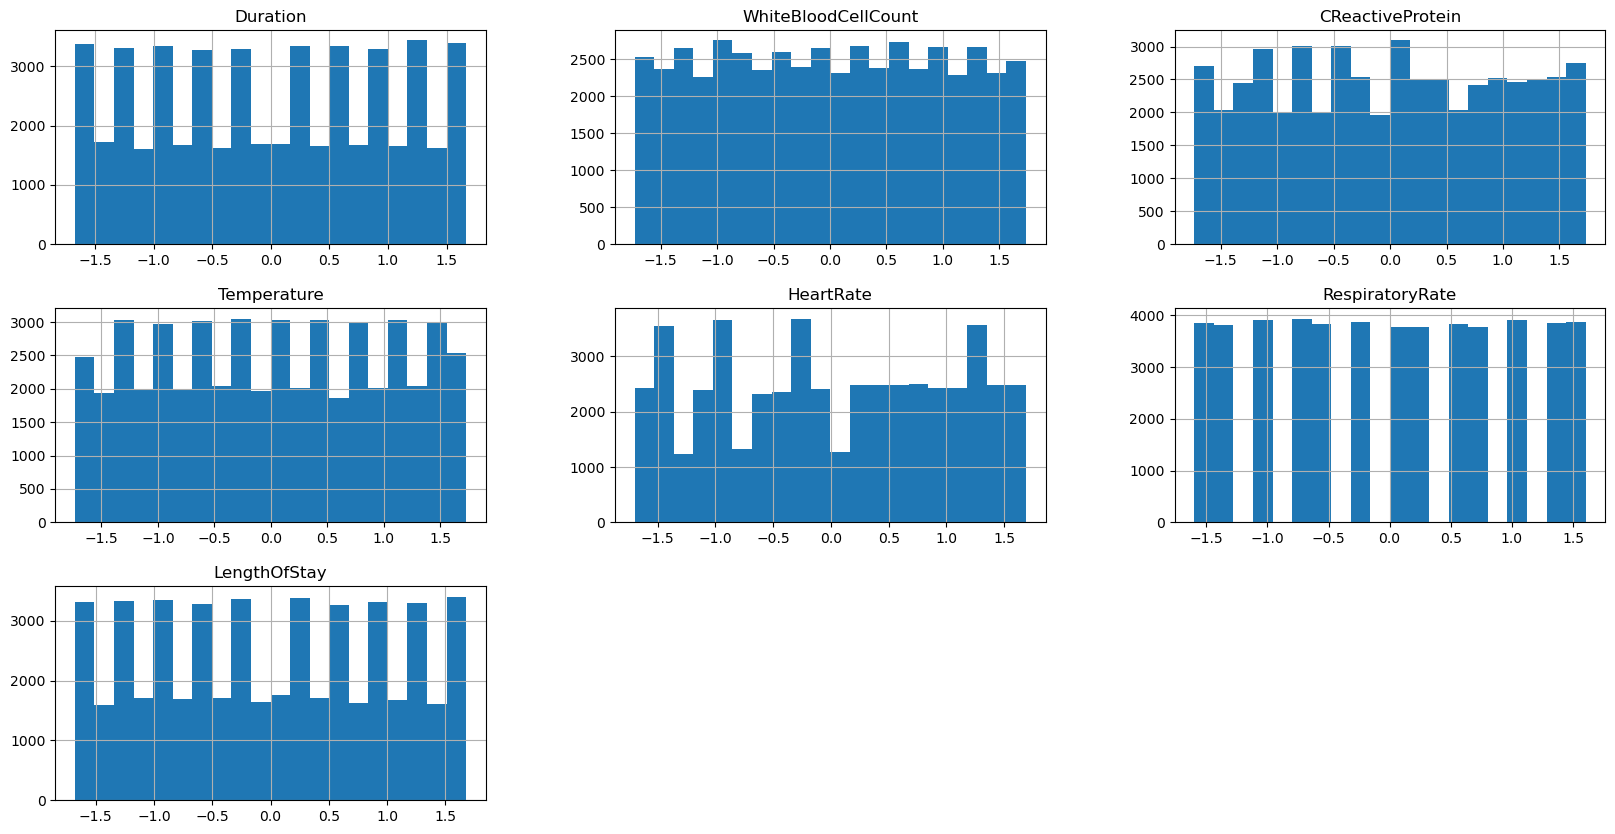

In [11]:
# plotting distribution of numerical columns
data[numerical_cols].hist(bins=20, figsize=(20,10))
plt.show()

E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


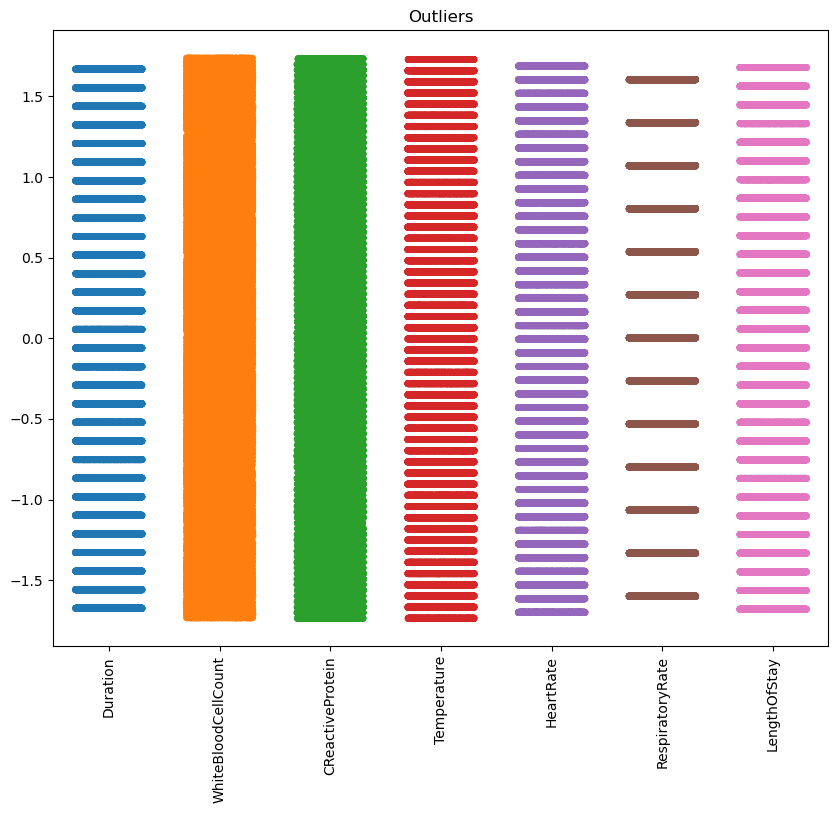

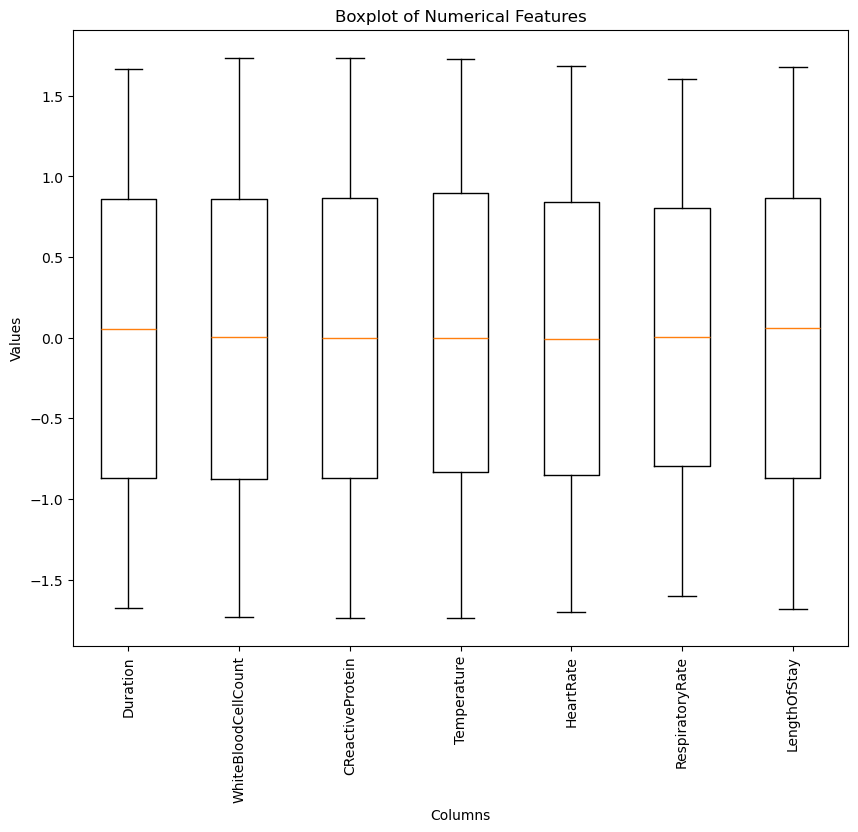

In [12]:
# Remove infinite values if any
data.replace([np.inf, -np.inf], np.nan, inplace=True)
# strip plot of numerical cols to idnetify outliers
plt.figure(figsize=(10, 8))
cols_to_plot = data[numerical_cols]
sns.stripplot(data=cols_to_plot, jitter=0.3, size=5)
plt.title("Outliers")
plt.xticks(rotation=90)
plt.show()

# box plot of numerical cols
plt.figure(figsize=(10, 8))
plt.boxplot(cols_to_plot.values, labels=cols_to_plot.columns)
plt.title("Boxplot of Numerical Features")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.show()

In [13]:
# Calculate Z-scores for each numerical column
from scipy.stats import zscore
z_scores = data[numerical_cols].apply(zscore)

# Define a threshold for identifying outliers
threshold = 3  # Commonly used threshold (z-score > 3 or < -3 indicates outliers)

# Create a DataFrame to flag outliers
outliers = (z_scores.abs() > threshold)

# Count the number of outliers for each column
outlier_counts = outliers.sum()

# Display results
print("Number of outliers in each numerical column:")
print(outlier_counts)

# Optional: Filter rows with outliers
rows_with_outliers = data[outliers.any(axis=1)]
print(f"\nTotal rows with outliers: {len(rows_with_outliers)}")

# Save the rows with outliers to a CSV (optional)
rows_with_outliers.to_csv("outliers_detected.csv", index=False)

Number of outliers in each numerical column:
Duration               0
WhiteBloodCellCount    0
CReactiveProtein       0
Temperature            0
HeartRate              0
RespiratoryRate        0
LengthOfStay           0
dtype: int64

Total rows with outliers: 0


In [14]:
#defining function to create skewness kurtosis report of numerical features
skew_values = []
skew_types = []
skew_levels = []
kurt_values = []
kurt_types = []

def create_skew_kurt_report(df, features):
    for feature in features:
        skew = df[feature].skew()
        kurt = df[feature].kurt()
        skew_values.append(skew)
        kurt_values.append(kurt)
        
        #determining skewness type (+ve or -ve)
        if skew >= 0:
            skew_types.append('Positive')
        else:
            skew_types.append('Negative')
            
        #determining skewness level (low, moderate or high)
        if skew == 0:
            skew_levels.append('Symmetrical')
        elif skew < -1 or skew > 1:
            skew_levels.append('High')
        elif (skew >= -1 and skew < -0.5) or (skew >= 0.5 and skew < 1):
            skew_levels.append('Moderate')
        else:
            skew_levels.append('Low')
            
        #determining kurtosis type (Platykurtic, Leptokurtic, Mesokurtic)
        if kurt < 3:
            kurt_types.append('Platykurtic')
        elif kurt > 3:
            kurt_types.append('Leptokurtic')
        else:
            kurt_types.append('Mesokurtic')
            
    report = pd.DataFrame({
        'Feature': features,
        'Skewness': skew_values,
        'Skewness Type': skew_types,
        'Skewness Level': skew_levels,
        'Kurtosis': kurt_values,
        'Kurtosis Type': kurt_types
    })
    
    report.set_index('Feature', inplace=True)

    return report

report = create_skew_kurt_report(data, numerical_cols)

#function to highlight 'Skewness Level' cell
def highlight_cells(val):
    if val == 'High':
        color = '#f5b7b1'  
    elif val == 'Moderate':
        color = '#f9e79f'  
    else:
        color = '#abebc6'  
    
    return f'background-color: {color}'

report = report.style.applymap(highlight_cells, subset=['Skewness Level'])
report

C:\Users\HP\AppData\Local\Temp\ipykernel_23824\2757986169.py:65: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  report = report.style.applymap(highlight_cells, subset=['Skewness Level'])


The dataset does not exhibit significant skewness. All features have nearly symmetrical distributions with "Low" skewness levels. There is no need to apply any skewness correction methods (e.g., log transformations) since the skewness is already minimal. Attempting to apply transformation on the features could potentially over-transform the data.

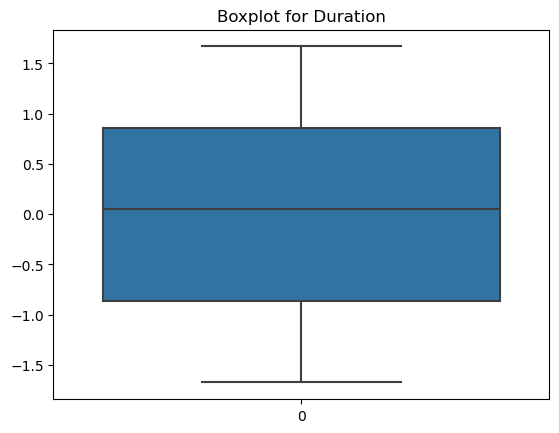

E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


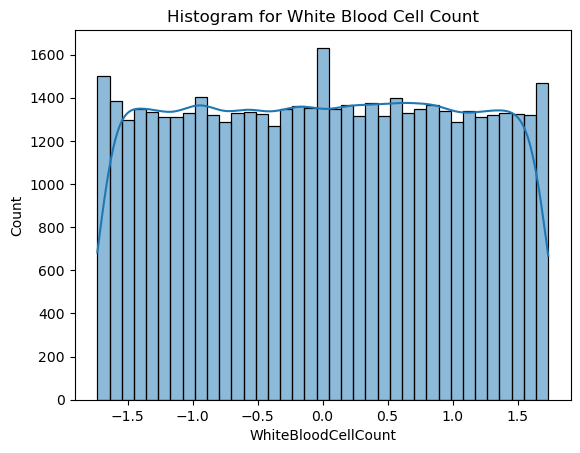

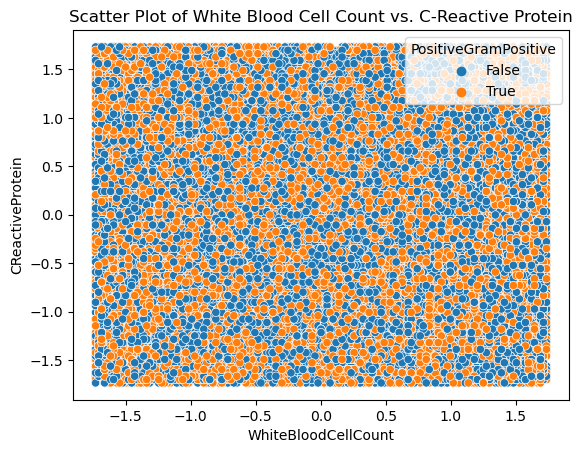

E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

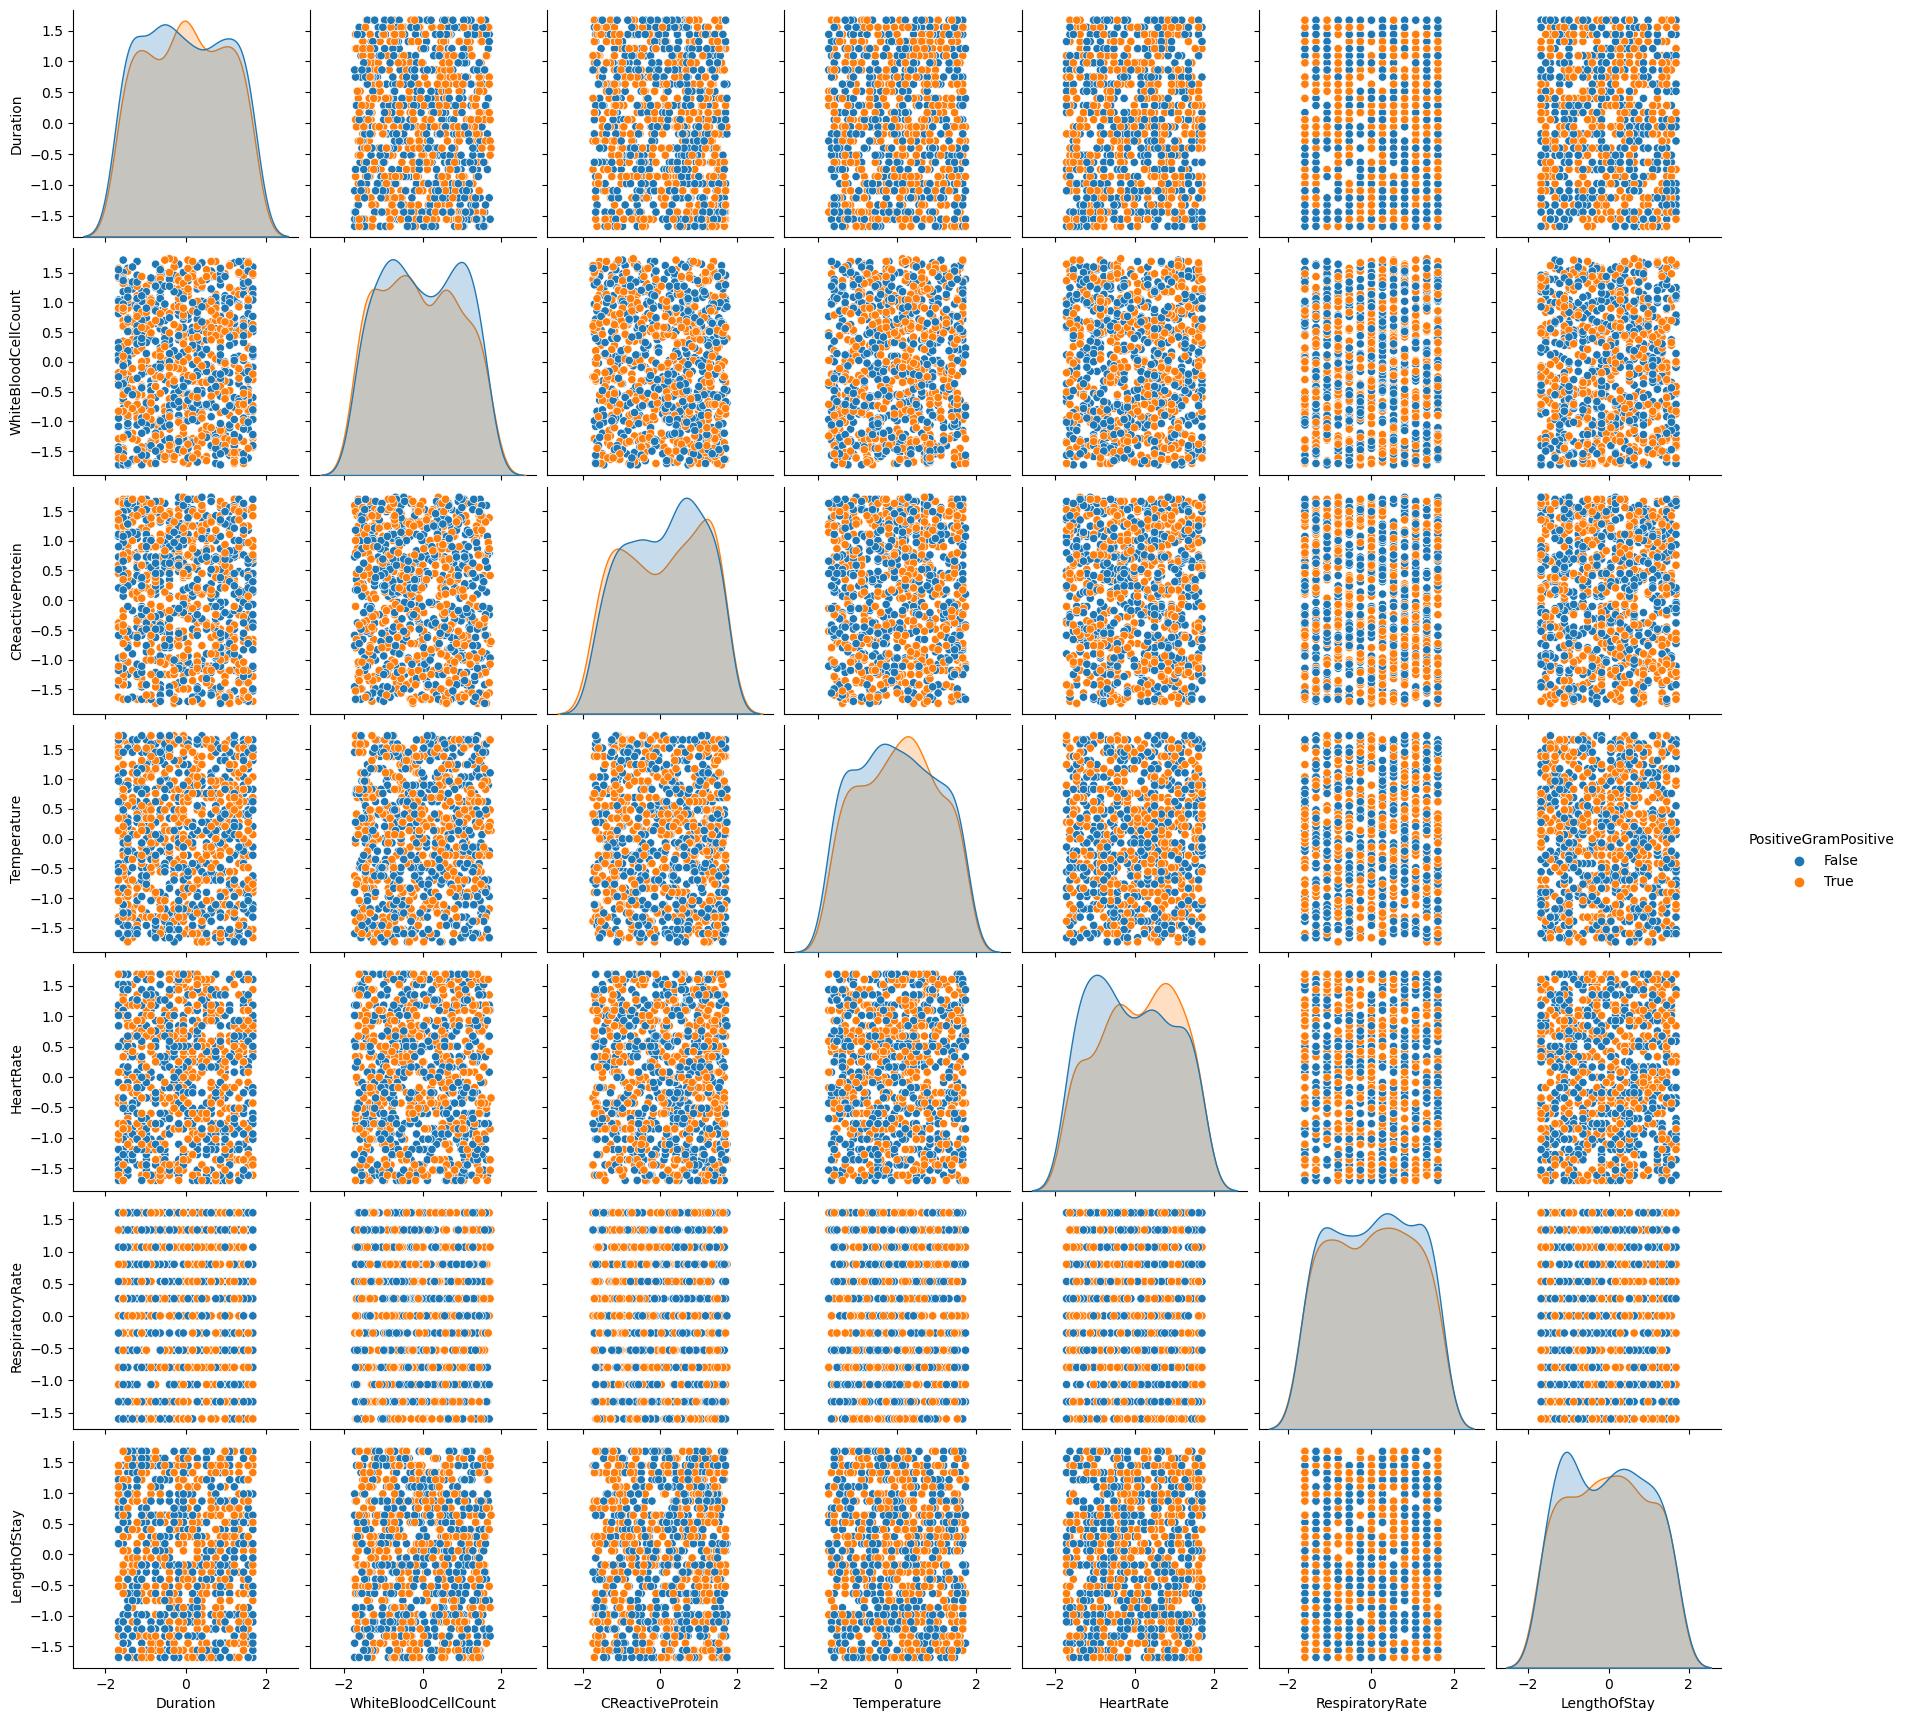

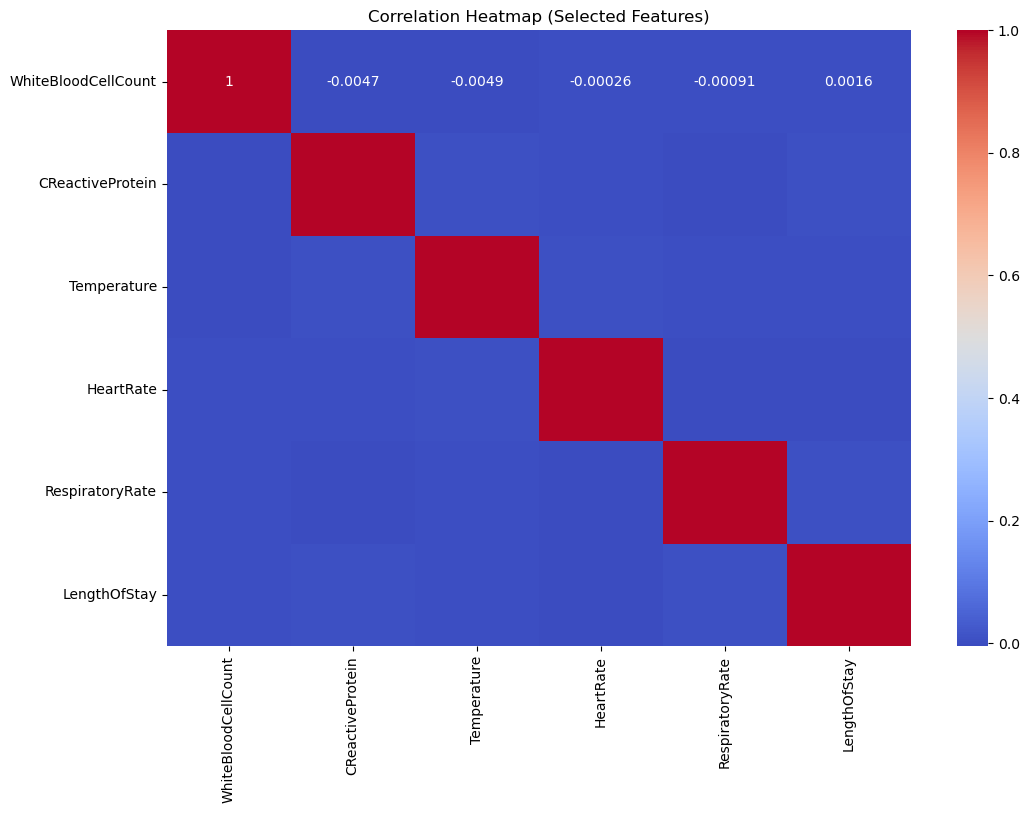

In [15]:
# STEP 2: Data Visualization Steps

# 1. Univariate Analysis
sns.boxplot(data['Duration'])
plt.title("Boxplot for Duration")
plt.show()

sns.histplot(data['WhiteBloodCellCount'], kde=True)
plt.title("Histogram for White Blood Cell Count")
plt.show()

# 2. Bivariate Analysis
sns.scatterplot(x=data['WhiteBloodCellCount'], y=data['CReactiveProtein'], hue=data['PositiveGramPositive'])
plt.title("Scatter Plot of White Blood Cell Count vs. C-Reactive Protein")
plt.show()

# 3. Multivariate Analysis
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
subset_cols = numerical_cols.intersection(data.columns)  # Ensure valid columns are used
sampled_data = data.sample(n=min(1000, len(data)), random_state=42)  # Use smaller data if dataset is large
sns.pairplot(sampled_data, hue='PositiveGramPositive', vars=subset_cols)
plt.show()

# Heatmap for Correlation
heatmap_cols = ['WhiteBloodCellCount', 'CReactiveProtein', 'Temperature', 
                'HeartRate', 'RespiratoryRate', 'LengthOfStay']  # Adjust based on your data
plt.figure(figsize=(12, 8))
sns.heatmap(data[heatmap_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Selected Features)")
plt.show()